In [1]:
import torch 

In [2]:
w = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

In [3]:
def forward(x):
    y = w*x+b
    return y

In [6]:
x = torch.tensor([[2],[9]]) # 여러 개의 input을 forward 함수에 넣어 처리한다.
forward(x)

tensor([[ 7],
        [28]], grad_fn=<AddBackward0>)

In [11]:
import torch.nn as nn
from torch.nn import Linear
torch.manual_seed(1) # torch에서 발생하는 랜덤성에 난수 부여해 랜덤성 제거.

model = Linear(in_features = 1, out_features = 1) # single input, single output.

print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [9]:
x = torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [19]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred
        

In [21]:
model = LR(input_size=1, output_size=1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.2774]], requires_grad=True), Parameter containing:
tensor([0.0493], requires_grad=True)]


In [24]:
x= torch.tensor([[1.5],[7.0]])
print(model.forward(x))

tensor([[0.4654],
        [1.9909]], grad_fn=<AddmmBackward>)


In [38]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

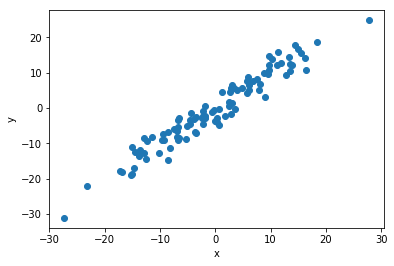

In [31]:
X=torch.randn(100,1)*10 # 100 rows, 1 column인 정규분포 따르는 값 생성
y = X + 3*torch.randn(100,1) # X값에 노이즈 추가
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [32]:
[w,b] = model.parameters()

In [47]:
#print(w,b)
#w1 = w[0][0]#.item() -> pythonic value값을 원하면 item() 함수를 쓰면 된다
#b1 = b[0]
#print(w1, b1)

def get_params():
    return (w[0][0].item(), b[0].item())

def plot_title(title):
    plt.title = title
    w1, b1 = get_params()
    
    x1 = np.array([-30,30])
    y1 = w1*x1 + b1
    plt.scatter(X, y)
    plt.plot(x1, y1, 'r')
    plt.show()

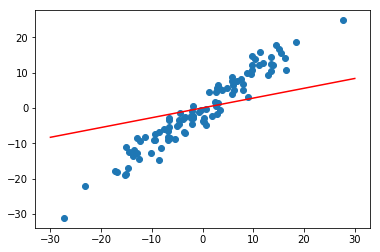

In [48]:
plot_title('initial')

In [52]:
criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = .001)

In [53]:
epochs = 100
losses=[]
for epoch in range(epochs):
    y_pred = model.forward(X)
    
    loss = criterion(y_pred, y) # 예측치와 실제 값의 차이
    print('epoch:', epoch, " loss: ", loss.item())
    
    losses.append(loss)
    
    
    optimizer.zero_grad() #optimization을 수행하기 이전 initialization에서는 optimizer 값들이 0이어야 한다. 
    # 그래야 backward로 계산하면서 오차값을 채워넣기 때문
    loss.backward() # loss의 derivative를 구하겠다는 함수
    optimizer.step()
    

epoch: 0  loss:  827.94677734375
epoch: 1  loss:  530.4345703125
epoch: 2  loss:  340.6864318847656
epoch: 3  loss:  219.6682891845703
epoch: 4  loss:  142.48500061035156
epoch: 5  loss:  93.25884246826172
epoch: 6  loss:  61.86323165893555
epoch: 7  loss:  41.83964157104492
epoch: 8  loss:  29.068941116333008
epoch: 9  loss:  20.924001693725586
epoch: 10  loss:  15.72929573059082
epoch: 11  loss:  12.416202545166016
epoch: 12  loss:  10.303166389465332
epoch: 13  loss:  8.95550537109375
epoch: 14  loss:  8.095989227294922
epoch: 15  loss:  7.547801494598389
epoch: 16  loss:  7.19817590713501
epoch: 17  loss:  6.9751877784729
epoch: 18  loss:  6.832968235015869
epoch: 19  loss:  6.742260932922363
epoch: 20  loss:  6.684407711029053
epoch: 21  loss:  6.647507667541504
epoch: 22  loss:  6.623971939086914
epoch: 23  loss:  6.608959674835205
epoch: 24  loss:  6.599382400512695
epoch: 25  loss:  6.593273162841797
epoch: 26  loss:  6.58937406539917
epoch: 27  loss:  6.586885929107666
epoch: 

Text(0, 0.5, 'Loss')

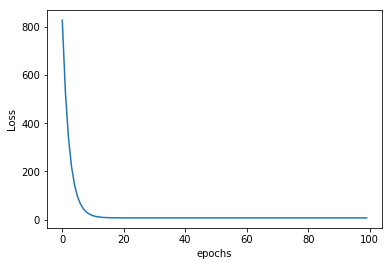

In [55]:
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('Loss')

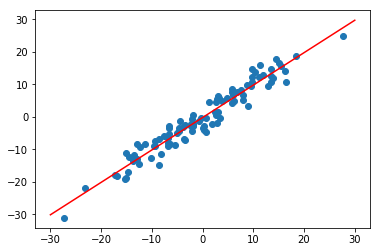

In [57]:
plot_title('trained_model')